In [2]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
np.random.seed(0)
a = np.random.randint(1, 100, 1000)
b = np.random.randint(1, 100, 1000)
c = np.random.randint(1, 100, 1000)
d = np.random.randint(1, 100, 1000)

# t-test

## 일표본 t-검정
- 그룹이 1

In [4]:
from scipy import stats

# 일표본 t-검정 시행
stats.ttest_1samp(a, a.mean())

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

## 독립표본 t-검정 
 - 그룹이 2

In [79]:
data = pd.read_csv('C:/Users/fkaus/Desktop/빅데이터 통계data/Ch08.t-검정(t-test)2/Ch0801.IST.csv', encoding = 'utf-8-sig')
data.head()

,t_group,t_time
0,1,48187
1,1,47245
2,1,51020
3,1,50732
4,1,52416


In [80]:
# 분산 동질성 검사(등분산 검정)
stats.levene(data.t_time[data.t_group == 1], data.t_time[data.t_group == 2]) 

LeveneResult(statistic=0.43289078232812456, pvalue=0.5131769222686233)

- p값이 통상적인 기준인 0.05보다 크므로 두 그룹의 분산이 동일하다는 가정을 받아들임

In [81]:
# 독립표본 t-검정(등분산일 경우)
stats.ttest_ind(data.t_time[data.t_group == 1], data.t_time[data.t_group == 2], equal_var = True) # 이분산은 equal_var = False

Ttest_indResult(statistic=-2.678999349105453, pvalue=0.009592682604064434)

In [82]:
data.groupby('t_group').mean()

,t_time
t_group,
1,48670.566667
2,51377.600000


- p값이 유의수준 0.05보다 작으므로 귀무가설을 기각
- '두 데이터는 유의미한 차이가 있다.'
- 2그룹이 통계적으로 유의하게 더 높게 나왔음.

## 대응표본 t-검정(paired)
- 한 사람을 두 번 측정

In [87]:
# 대응표본 t-검정 시행
stats.ttest_rel(a, b) # a-before, b-after

Ttest_relResult(statistic=-0.5040247223776022, pvalue=0.6143551380591987)

# 분산분석(ANOVA)

- 참고 : ANOVA 모형의 가정
    - 정규성: 독립변수에 따른 종속변수는 정규분포를 만족해야 함.
        - Shapiro-Wilk
    - 독립성: 독립변수 그룹군은 서로 독립적이어야 함.
        - 잔차검정
    - 분산의 동질성: 독립변수에 따른 종속변수 분포의 분산은 각 군마다 동일해야 함.
        - Hartley검정, Bartlett검정, Levene검정

## 일원 분산분석(One-Way ANAVA)
- 그룹이 3 이상

In [53]:
df = pd.read_csv('C:/Users/user/Desktop/stats_data/Ch09.분산분석(ANOVA)1/Ch0901.OWA.csv', encoding = 'utf-8-sig')
df.head(10)

,group,score
0,1,85
1,2,78
2,3,63
3,4,88
4,1,93
5,2,83
6,3,56
7,4,53
8,1,94
9,2,97


In [75]:
# 분산 동질성 검사(등분산 검정) - Levene
stats.levene(df.score[df.group == 1], df.score[df.group == 2], df.score[df.group == 3], df.score[df.group == 4]) 

LeveneResult(statistic=1.5622032060443554, pvalue=0.2014879807833761)

In [76]:
# 분산 동질성 검사(등분산 검정) - bartlett
stats.bartlett(df.score[df.group == 1], df.score[df.group == 2], df.score[df.group == 3], df.score[df.group == 4])

BartlettResult(statistic=6.0049371189812195, pvalue=0.11137027043376477)

- bartlett, levene 검정에서 모두 p-value가 0.05를 넘었으므로, 그룹들 간 분산이 동일하다는 귀무가설을 받아들임
- bartlett는 정규분포에 민감하기 때문에 levene를 많이 사용

In [77]:
# 분산이 동일하다는 가정하에 분산분석 실행
# 참고 - 이분산일 경우 비모수분석 실시

import statsmodels.formula.api as sm  # 회귀식 적합
from statsmodels.stats.anova import anova_lm  # 분산분석

# C(group)은 카테고리 타입 데이터임을 의미함. 필수로 넣어줘야 함
model = sm.ols(formula = 'score ~ C(group)', data = df)
model = model.fit()

In [78]:
anova_lm(model) 

,df,sum_sq,mean_sq,F,PR(>F)
C(group),3.0,919.115675,306.371892,3.54624,0.016346
Residual,135.0,11663.114541,86.393441,NaN,NaN


- 분산분석 결과, 매장별 서비스 점수의 차이는 차이가 있음(p < 0.05)

In [79]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd # 사후분석 - 튜키

posthoc = pairwise_tukeyhsd(df.score, df.group)
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -0.6809    0.9  -6.4825  5.1206  False
     1      3  -6.8684 0.0156  -12.774 -0.9628   True
     1      4  -2.8171 0.5405  -8.3288  2.6945  False
     2      3  -6.1875 0.0478 -12.3325 -0.0425   True
     2      4  -2.1362 0.7451  -7.9037  3.6312  False
     3      4   4.0513 0.2805  -1.8208  9.9234  False
-----------------------------------------------------


- 1, 3과 2, 3 데이터의 차이가 유의미함(p < 0.05)
- 그룹1(a)과 그룹2(b)
|~|지역1|지역2|지역3|지역4|
|--|--|--|--|--|
|Tukey|a|a, b|a, b| b|

## 반복측정 분산분석(Repeated Measures ANOVA)
- 그룹이 3이상, 반복측정

## 이원 분산분석(Two-Way ANOVA)
- 요인 + 요인

In [6]:
df = pd.read_csv('C:/Users/fkaus/Desktop/빅데이터 통계data/Ch10.분산분석(ANOVA)2/Ch1001.TWA.csv', encoding = 'utf-8-sig')
df.head()

,meth,temp,taste
0,1,2,95
1,1,2,93
2,1,2,94
3,1,2,98
4,1,2,97


In [66]:
import statsmodels.formula.api as sm  # 회귀식 적합
from statsmodels.stats.anova import anova_lm  # 분산분석

# C(group)은 카테고리 타입 데이터임을 의미함. 필수로 넣어줘야 함
model = sm.ols(formula = 'taste ~ C(meth)*C(temp)', data = df)
model = model.fit()

anova_lm(model) 

,df,sum_sq,mean_sq,F,PR(>F)
C(meth),1.0,8.066667,8.066667,1.733091,1.933794e-01
C(temp),1.0,10.833259,10.833259,2.327483,1.327357e-01
C(meth):C(temp),1.0,768.381622,768.381622,165.083737,2.446261e-18
Residual,56.0,260.651786,4.654496,NaN,NaN


- 맛은 방법과 온도에 따라 유의한 차이가 없음
- 방법과 온도의 상호작용 효과는 유의함

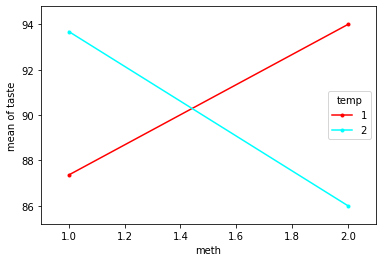

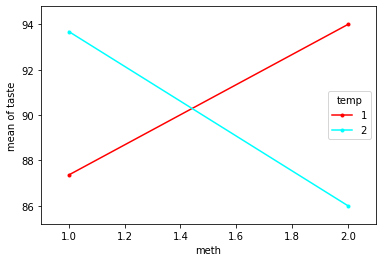

In [74]:
# 상호작용 그래프
from statsmodels.graphics.factorplots import interaction_plot

interaction_plot(df.meth, df.temp, df.taste)

- 사후검정
    - 상호작용이 있을 경우 : 그룹별로 나누어서 분석(사후검정)
        - 위 예시에선, 방법(meth)별로, 혹은 온도(temp)별로 그룹을 나누어서 분석
        - 방법1[meth == 1]에 대해 t.test(온도에 대한 차이를 분석) or tukey((온도들에 대한 차이를 분석)
        - 방법2[meth == 1]에 대해 t.test(온도에 대한 차이를 분석) or tukey((온도들에 대한 차이를 분석)
        
    - 상호작용이 없을 경우 : 각 변수별 주효과 분석(t-test, ANOVA)한 것 보고(사후검정x)

In [77]:
df1 = df[df.meth == 1].drop('meth', axis = 1)
df2 = df[df.meth == 2].drop('meth', axis = 1)

In [86]:
# 방법1에 대한 독립표본 t-검정(등분산일 경우)
stats.ttest_ind(df1.taste[df1.temp == 1], df1.taste[df1.temp == 2], equal_var = True) # 이분산은 equal_var = False

Ttest_indResult(statistic=-7.0903165390541085, pvalue=1.029339189978074e-07)

In [87]:
# 방법2에 대한 독립표본 t-검정(등분산일 경우)
stats.ttest_ind(df2.taste[df2.temp == 1], df2.taste[df2.temp == 2], equal_var = True) # 이분산은 equal_var = False

Ttest_indResult(statistic=11.957371090848326, pvalue=1.6201293365382045e-12)

- 방법 1에 대한 t-검정 결과, 두 온도에 대한 차이가 있음을 알 수 있다.
- 방법 2에 대한 t-검정 결과, 두 온도에 대한 차이가 있음을 알 수 있다.

In [88]:
df1.groupby('temp').mean(), df2.groupby('temp').mean()

(          taste
 temp           
 1     87.357143
 2     93.687500,
       taste
 temp       
 1        94
 2        86)

- 방법 1에서 온도를 2로 하였을 때 맛이 통계적으로 유의미하게 좋아진다.
- 방법 2에서 온도를 1로 하였을 때 맛이 통계적으로 유의미하게 좋아진다.

- 총 정리
> 분석 결과, 시간과 방법에 따른 상호작용 효과가 존재했다(F = 165.08, p = 0.000). 방법 1에서는 온도를 2로 하였을 떄 맛이 가장 좋았으며, 방법 2에서는 온도를 1로 하였을 때 맛이 가장 좋았따.

## 이원 반복측정 분산분석(Two-Way Repeated Measures ANOVA)
- 반복 + 요인

# 회귀분석

## 상관분석

In [38]:
df = pd.read_csv('C:/Users/fkaus/Desktop/빅데이터 통계data/Ch11.회귀분석(Regression)/Ch1101.상관분석(CORR).csv', encoding = 'cp949')
df.columns = ['Weight', 'Height']
df.head()

,Weight,Height
0,72,176
1,72,172
2,70,182
3,43,160
4,48,163


In [39]:
df.describe()

,Weight,Height
count,30.000000,30.000000
mean,62.700000,170.333333
std,11.519549,8.683450
min,43.000000,148.000000
25%,54.000000,164.250000
50%,63.000000,170.000000
75%,72.000000,175.750000
max,88.000000,188.000000


In [40]:
df.corr()

,Weight,Height
Weight,1.000000,0.856645
Height,0.856645,1.000000


In [46]:
# 판다스로 히트맵
df.style.background_gradient(cmap='summer')

,Weight,Height
0,72,176
1,72,172
2,70,182
3,43,160
4,48,163
5,54,165
6,51,168
7,52,163
8,73,182
9,45,148


<AxesSubplot:>

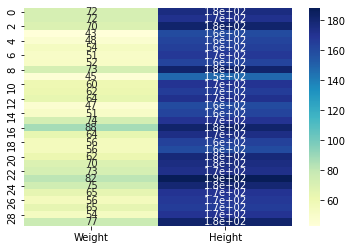

In [45]:
# seaborn 히트맵
sns.heatmap(df, annot=True, cmap='YlGnBu') 

<AxesSubplot:xlabel='Weight', ylabel='Height'>

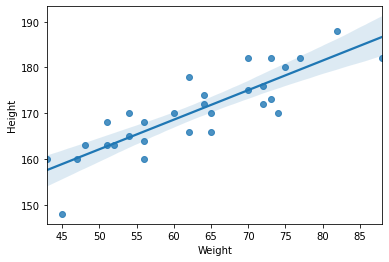

In [42]:
sns.regplot(x = 'Weight', y = 'Height', data = df)

## 단순 선형 회귀분석

In [68]:
df = pd.read_csv('C:/Users/fkaus/Desktop/빅데이터 통계data/Ch11.회귀분석(Regression)/Ch1102.단순 선형회귀분석(REG).csv', encoding = 'cp949')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col     62 non-null     float64
 1   fat     62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


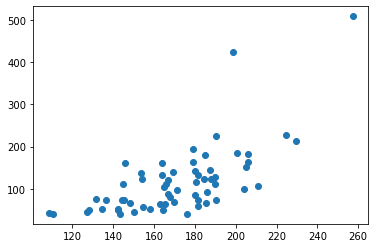

In [53]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1]);

데이터 준비(X, y)

In [54]:
X = df.col.to_numpy().reshape(len(df.col), 1)
X.shape

(62, 1)

In [56]:
y = df.fat.to_numpy()
y.shape

(62,)

단순선형회귀모형

In [57]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)
# 계수, 절편
reg.coef_, reg.intercept_

(array([1.95945699]), -218.19532653561242)

In [58]:
# 결정계수
reg.score(X, y)

0.45423672794089276

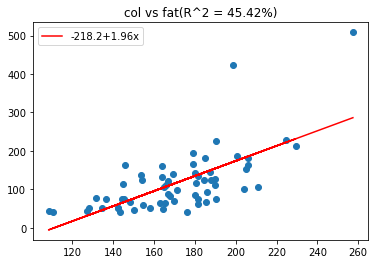

In [60]:
label = str(round(reg.intercept_, 2)) + '+' + str(round(reg.coef_[0], 2)) + 'x'
plt.scatter(X, y);

pred = reg.predict(X)
plt.plot(X, pred, color = 'red', label = label)
plt.legend()
plt.title('col vs fat(R^2 = 45.42%)');

In [86]:
new = [[120]]
reg.predict(new)

array([42.57525864])

## 다중 선형 회귀분석
- BDA2021-2

## 로지스틱 회귀분석
- BDA2021-2

# 교차 분석(chi square)
- 명목 + 명목

## 동질성 검정
- 집단간 분포의 동질성(Homogeneity of proportions)을 통해 두 집단간 차이를 검정
- 사전실험설계
- 코호트 연구: 상대적 위험율(RR, Relative Risk)

In [22]:
df = pd.read_csv('C:/Users/user/Desktop/stats_data/Ch12.교차분석(chi square)/Ch1201.사전설계교차분석.csv', encoding = 'cp949')
df.head()

,group,cold
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [27]:
df2 = pd.crosstab(df.group, df.cold)
df2

cold,1,2
group,,
1,33,17
2,12,38


In [35]:
# 교차분석 - 연속성을 위한 교정(vates's 연속성 교정 - 이항분포로 계싼한 정확한 확률에 더욱 근사하게 됨)

chi = stats.chi2_contingency(observed = df2)
chi

(16.161616161616163,
 5.8160786416504276e-05,
 1,
 array([[22.5, 27.5],
        [22.5, 27.5]]))

In [29]:
# 교차분석 - 연속성 교정 x 
chi = stats.chi2_contingency(observed = df2, correction = False)
chi

(17.81818181818182,
 2.430496069477897e-05,
 1,
 array([[22.5, 27.5],
        [22.5, 27.5]]))

- 결과: 카이스퀘어 값. p-value, df(자유도), array(기대치)
    - 기대치: (0,0)은 22.5까지 나오면 통계적으로 문제 없다는 의미)
- 통계적으로 유의한 차이가 없음(yate's correction 반영 안 한 기준)
- 상대 위험율 계산
    - 비타민을 복용하면 감기에 안 걸릴 확률이 그렇지 않은 사람에 비해 2.75배 높게 나타남
    - 상대위험율 : 33 / 12


## 독립성 검정
- 변수들 간 동립성(independence of variables) 또는 관련성을 건정
- 사후사례대조(사후의 결과를 토대로 연구)
- 사례 - 대조 연구: 오즈비(odds ratio)

In [90]:
df = pd.read_csv('C:/Users/user/Desktop/stats_data/Ch12.교차분석(chi square)/Ch1202.사후설계교차분석(PostCH).csv', encoding = 'cp949')
df

,cancer,smoking,count
0,1,1,170867
1,1,2,51690
2,1,3,46598
3,1,4,29178
4,1,5,27784
5,2,1,723
6,2,2,370
7,2,3,497
8,2,4,319
9,2,5,504


In [91]:
df2 = pd.pivot_table(df, index = 'cancer', columns = 'smoking', values = 'count')
df2.columns = ['비흡연군', '장기흡연군', '단기흡연군', '재흡연군', '흡연군']
df2.index = ['폐암 무', '폐암 유']
df2

,비흡연군,장기흡연군,단기흡연군,재흡연군,흡연군
폐암 무,170867,51690,46598,29178,27784
폐암 유,723,370,497,319,504


In [ ]:
# 임시


In [86]:
# 카이제곱 
stats.chi2_contingency(observed = df2, correction = False)

(771.8353549032144,
 9.676109758345301e-166,
 4,
 array([[170329.69905336,  51677.62767479,  46749.09480108,
          29280.34928013,  28080.22919064],
        [  1260.30094664,    382.37232521,    345.90519892,
            216.65071987,    207.77080936]]))

- 결과: 카이스퀘어 값. p-value, df(자유도), array(기대치)
    - 기대치: (0,0)은 170329.7까지 나오면 통계적으로 문제 없다는 의미)
- 통계적으로 유의한 차이가 있음(yate's correction 반영 안 한 기준)
- 오즈비(odds ratio) 계산
    - 흡연을 하면 폐암에 걸릴 확률이 몇 배나 높아질 것인가?
        - 흡연군의 폐암(유)비 = 502/27784 = 0.018
        - 비흡연군의 폐암(유)비 = 723 / 170867 = 0.004
        - 비흡연폐암(유)비 대비 흡연폐얌(유)비 = 0.018~ / 0.004~ = 4.27
        - 결론 = 흡연을 하면 폐암에 걸릴 확률이 비흡연자들의 폐암에 걸릴 확률보다 4.27배 높음


In [96]:
a = 502 / 27784
b = 723 / 170867
a, b, a/b

(0.0180679527785776, 0.004231361234176289, 4.270009526164895)

-------
-------